In [105]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Replace 'path_to_your_dataset.csv' with the actual path where your dataset is located
file_path = 'customer_purchase_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
data.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [106]:
# Summary statistics
data.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [126]:
data.sample(10)

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
1113,25,1,96745.199760,5,1,37.822692,0,0,0
1014,26,0,21175.000980,12,1,15.427886,0,5,0
851,18,1,54456.035682,13,4,4.271269,1,2,1
1431,46,1,59820.754841,18,2,4.000352,0,3,0
984,20,0,83318.049446,2,4,16.050513,1,0,0
746,60,0,105455.952682,2,4,44.872549,1,1,0
1321,29,1,144164.976948,8,0,9.496190,1,2,1
481,62,1,119959.961674,4,3,30.080881,0,5,0
1287,66,0,43317.408662,3,2,51.850634,0,3,0
869,58,1,20175.971343,5,1,31.687956,1,1,0


In [107]:
data.columns

Index(['Age', 'Gender', 'AnnualIncome', 'NumberOfPurchases', 'ProductCategory',
       'TimeSpentOnWebsite', 'LoyaltyProgram', 'DiscountsAvailed',
       'PurchaseStatus'],
      dtype='object')

In [108]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


C:\Users\Jothika\AppData\Local\Temp\ipykernel_17344\688832009.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Gender'], palette='pastel', legend=False)  # Updated line
C:\Users\Jothika\AppData\Local\Temp\ipykernel_17344\688832009.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['ProductCategory'], palette='bright', legend=False)  # Updated line


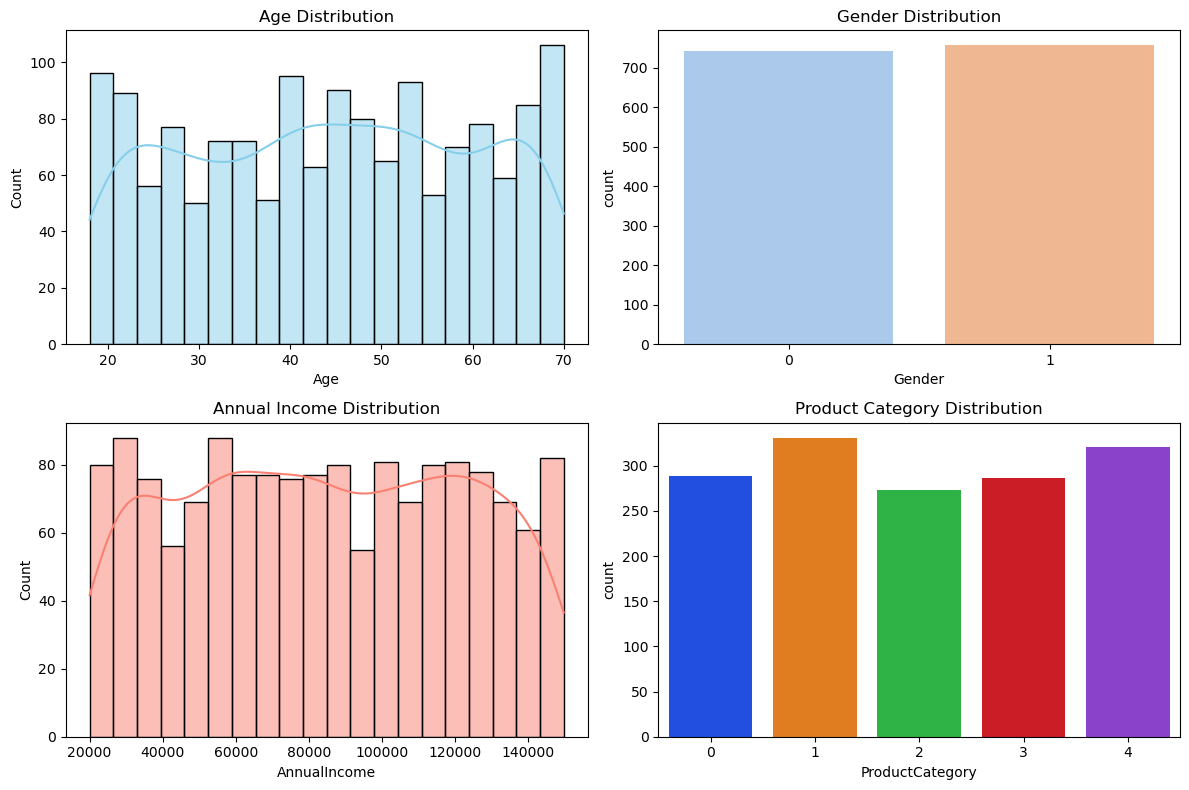

In [109]:
# Summary statistics
data.describe()

# Distribution plots
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.histplot(data['Age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.countplot(x=data['Gender'], palette='pastel', legend=False)  # Updated line
plt.title('Gender Distribution')

plt.subplot(2, 2, 3)
sns.histplot(data['AnnualIncome'], bins=20, kde=True, color='salmon')
plt.title('Annual Income Distribution')

plt.subplot(2, 2, 4)
sns.countplot(x=data['ProductCategory'], palette='bright', legend=False)  # Updated line
plt.title('Product Category Distribution')

plt.tight_layout()
plt.show()


In [110]:
data.isnull().sum()

Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64

Number of outliers removed: 0


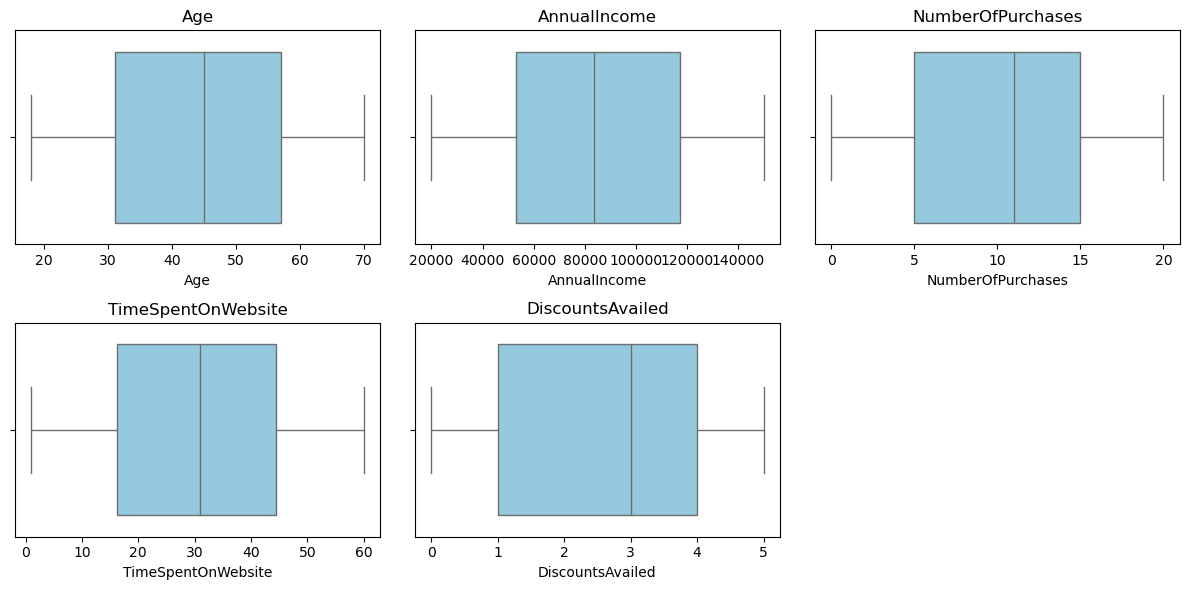

Updated data shape after outlier removal: (1500, 9)


In [111]:
# Detect outliers using IQR method for numerical columns
numerical_cols = ['Age', 'AnnualIncome', 'NumberOfPurchases', 'TimeSpentOnWebsite', 'DiscountsAvailed']

Q1 = data[numerical_cols].quantile(0.25)
Q3 = data[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds to filter outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter outliers
outliers = ((data[numerical_cols] < lower_bound) | (data[numerical_cols] > upper_bound)).any(axis=1)
data_no_outliers = data[~outliers]

# Display number of outliers removed
print(f'Number of outliers removed: {data.shape[0] - data_no_outliers.shape[0]}')

# Visualize boxplots after outlier removal
plt.figure(figsize=(12, 6))

for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=data_no_outliers[col], color='skyblue')
    plt.title(col)

plt.tight_layout()
plt.show()

# Check updated data shape after outlier removal
print(f'Updated data shape after outlier removal: {data_no_outliers.shape}')

In [112]:
# Split data into features (X) and target (y)
X = data.drop(columns=['PurchaseStatus'])
y = data['PurchaseStatus']

In [113]:
# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## Random Forest Classifier Model

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96       172
           1       0.99      0.90      0.94       128

    accuracy                           0.95       300
   macro avg       0.96      0.95      0.95       300
weighted avg       0.96      0.95      0.95       300



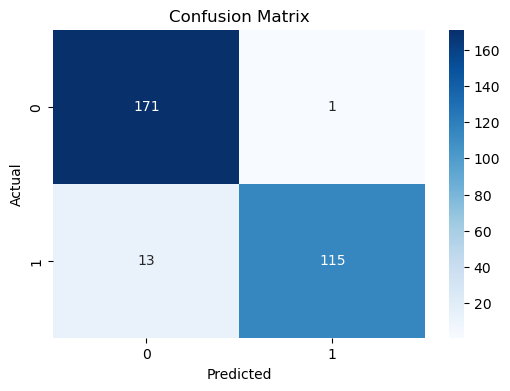

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming X_scaled and y are already defined from your dataset
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Initialize and fit the RFM model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Save the trained model to a pickle file
with open('rf_model.pkl', 'wb') as f:
    pickle.dump(model, f)
        
# Predictions
y_pred = model.predict(X_test)

# Model evaluation
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
